In [1]:
import os
from diffusers import StableDiffusionInpaintPipeline
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


In [2]:
# Load stable diffusion model pipeline
SPECIAL_SD_MODEL_MADE_FOR_INPAINT = "runwayml/stable-diffusion-inpainting"
pipe = StableDiffusionInpaintPipeline.from_pretrained(SPECIAL_SD_MODEL_MADE_FOR_INPAINT, torch_dtype=torch.float16)
pipe = pipe.to(DEVICE)

unet\diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [55]:
DATA_DIR = os.path.join("MAT", "test_sets", "Places")
RESULT_DIR = os.path.join(DATA_DIR, "inpaint_results")
os.makedirs(RESULT_DIR, exist_ok=True)
IMAGE_DIR = os.path.join(DATA_DIR, "images")
MASK_DIR = os.path.join(DATA_DIR, "masks")

In [58]:
prompt = ""
ext_save = ".png"
for img_name in os.listdir(IMAGE_DIR):
    mask_name = img_name.replace(".jpg", ".png")
    if "test" in img_name:
        mask_name = mask_name.replace("test", "mask")
    if "test" not in img_name:
        continue

    result_path = os.path.join(RESULT_DIR, f"{os.path.splitext(img_name)[0]}{ext_save}")
    img_path = os.path.join(IMAGE_DIR, img_name) 
    mask_path = os.path.join(MASK_DIR, mask_name)

    # Load images and masks
    img = Image.open(img_path)
    mask = Image.open(mask_path)
    mask = Image.fromarray(255*(1 - (np.array(mask) // 255)))  # Invert mask
    # Generate inpainting
    image = pipe(prompt=prompt, image=img, mask_image=mask).images[0]  # pipeline already gives us PIL
    image.save(result_path)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

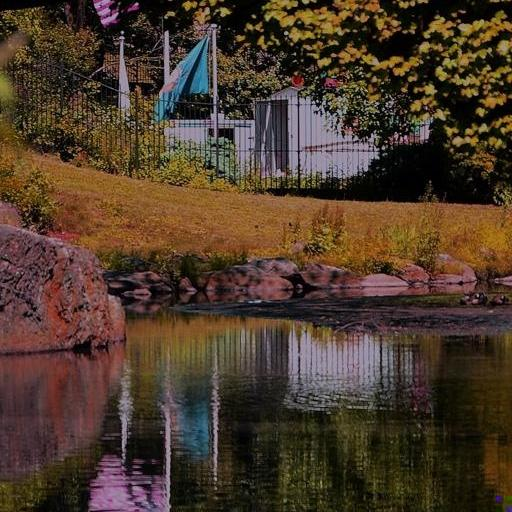

In [52]:
img

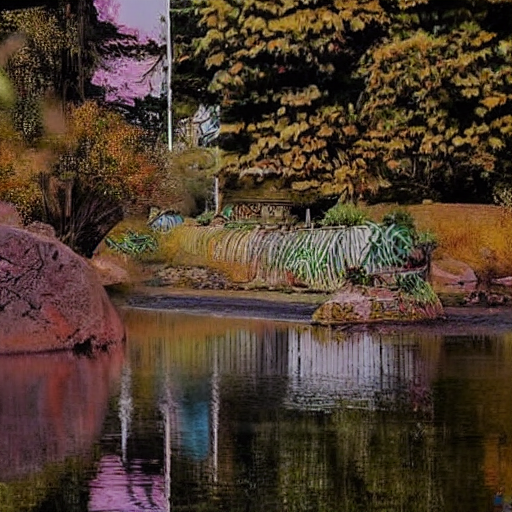

In [53]:
image

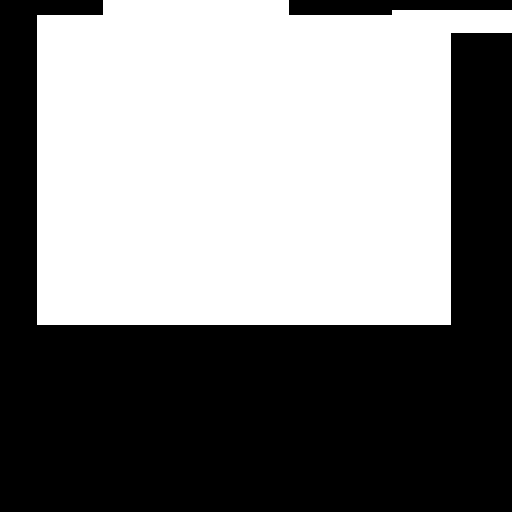

In [54]:
mask

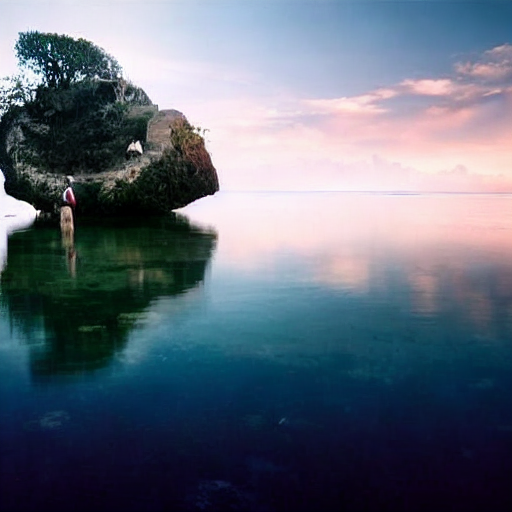

In [26]:
image

In [ ]:
# Generate inpainting
prompt = ""
image = pipe(prompt=prompt, image=raw_image, mask_image=mask).images[0]  # pipeline already gives us PIL

# Save image
image.show()
image.save(os.path.join(SAVE_PATH, f"result{ext}"))